In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import numpy as np

In [75]:
def readdata():
    data = pd.read_csv('titanic/train.csv',index_col=0)
    data.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)
    data['Sex'] = (data['Sex']=='male').astype('int')
    
    labels = data['Embarked'].unique().tolist()
    data['Embarked'] = data['Embarked'].apply(lambda n:labels.index(n))
    data = data.fillna(0)
    return data

train = readdata()

#### Attention: It's fatal if there's NAN in the training data. So you have to use data=data.fillna(0)

In [4]:
y = train['Survived'].values
x = train.drop(['Survived'],axis=1).values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
train_score = clf.score(x_train,y_train)
test_score = clf.score(x_test,y_test)
print('train_score = ',train_score,' , test_score',test_score)

(712, 7) (179, 7) (712,) (179,)
train_score =  0.9845505617977528  , test_score 0.7932960893854749


In [110]:
import matplotlib.pyplot as plt

In [111]:
def adjusting_depth(depth):
    tmp1 = 0
    tmp2 = 0
    for i in range(10):
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
        clf = DecisionTreeClassifier(max_depth=depth)
        clf.fit(x_train,y_train)
        tmp1 += clf.score(x_train,y_train)
        tmp2 += clf.score(x_test,y_test)
    
    train_score = tmp1/10
    test_score = tmp2/10
    print('train_score = ',train_score,' , test_score',test_score)
    return (train_score,test_score)

train_score =  0.788623595505618  , test_score 0.7793296089385475
train_score =  0.8101123595505617  , test_score 0.8094972067039107
train_score =  0.8276685393258427  , test_score 0.8022346368715084
train_score =  0.852808988764045  , test_score 0.8089385474860336
train_score =  0.8703651685393258  , test_score 0.8044692737430168
train_score =  0.8865168539325842  , test_score 0.8022346368715084
train_score =  0.9096910112359552  , test_score 0.7837988826815643
train_score =  0.9200842696629212  , test_score 0.7994413407821229
train_score =  0.9393258426966293  , test_score 0.78268156424581
train_score =  0.9466292134831461  , test_score 0.7804469273743017
train_score =  0.9485955056179775  , test_score 0.8078212290502792
train_score =  0.9644662921348315  , test_score 0.776536312849162
train_score =  0.9689606741573036  , test_score 0.788268156424581
best depth =  3 best score =  0.8094972067039107


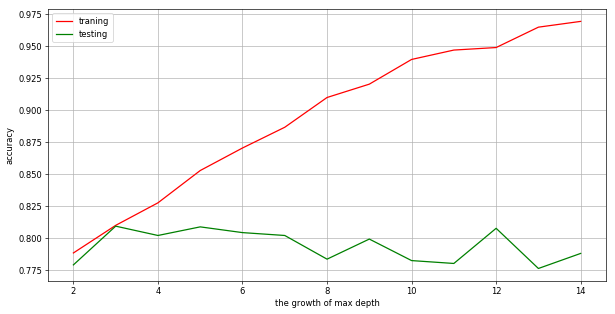

In [112]:
depths = range(2,15)
scores = [adjusting_depth(d) for d in depths]
train_scores = [s[0] for s in scores]
test_scores = [s[1] for s in scores]

best_score_index = np.argmax(test_scores)
best_score = test_scores[best_score_index]
best_depth = depths[best_score_index]
print('best depth = ',best_depth,'best score = ',best_score)

plt.figure(figsize=(12,6),dpi=60)
plt.grid()
plt.xlabel('the growth of max depth')
plt.ylabel('accuracy')
plt.plot(depths,train_scores,'r-',label='traning')
plt.plot(depths,test_scores,'g-',label='testing')
plt.legend()
plt.show()

In [113]:
def adjusting_min_impurity_split(impurity):
    tmp1 = 0
    tmp2 = 0
    for i in range(10):
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
        clf = DecisionTreeClassifier(criterion='entropy' ,min_impurity_split=impurity)
        clf.fit(x_train,y_train)
        tmp1 += clf.score(x_train,y_train)
        tmp2 += clf.score(x_test,y_test)
    
    train_score = tmp1/10
    test_score = tmp2/10
    #print('train_score = ',train_score,' , test_score',test_score)
    return (train_score,test_score)

In [114]:
import warnings
warnings.filterwarnings("ignore")

best impurity =  0.5353535353535354 best score =  0.828491620111732


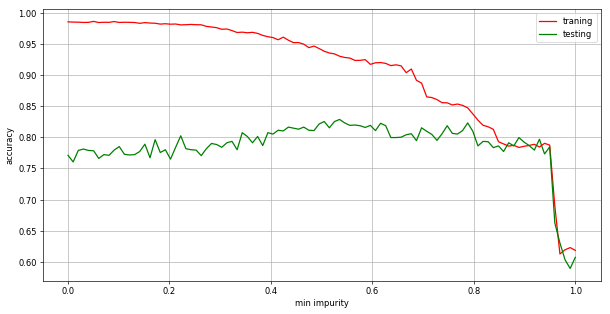

In [115]:
impurities = np.linspace(0,1,100)
scores = [adjusting_min_impurity_split(i) for i in impurities]
train_scores = [s[0] for s in scores]
test_scores = [s[1] for s in scores]

best_score_index = np.argmax(test_scores)
best_score = test_scores[best_score_index]
best_impurity = impurities[best_score_index]
print('best impurity = ',best_impurity,'best score = ',best_score)

plt.figure(figsize=(12,6),dpi=60)
plt.grid()
plt.xlabel('min impurity')
plt.ylabel('accuracy')
plt.plot(impurities,train_scores,'r-',label='traning')
plt.plot(impurities,test_scores,'g-',label='testing')
plt.legend()
plt.show()

# Automatic adjusting: GridSearchCV
#### cv here means the cross validation

In [116]:
import time
from sklearn.model_selection import GridSearchCV

In [117]:
def plot_curve(x,cv_results,xlabel):
    train_scores_mean = clf.cv_results_['mean_train_score']
    train_scores_std = clf.cv_results_['std_train_score']
    test_scores_mean = clf.cv_results_['mean_test_score']
    test_scores_std = clf.cv_results_['std_test_score']
    
    
    plt.figure(figsize=(8,4),dpi=60)
    plt.grid()
    plt.title('parameter adjusting')
    plt.xlabel(xlabel)
    plt.ylabel('accuracy')
    plt.fill_between(x,train_scores_mean-train_scores_std,
                     train_scores_mean+train_scores_std,alpha=0.3,color='r')
    plt.fill_between(x,test_scores_mean-test_scores_std,
                     test_scores_mean+test_scores_std,alpha=0.3,color='g')
    plt.plot(x,train_scores_mean,'r--',label='traning')
    plt.plot(x,test_scores_mean,'g--',label='testing')
    plt.legend()
    plt.show()

time =  0.359375
{'min_impurity_split': 0.19387755102040816}
best score =  0.819304152637486


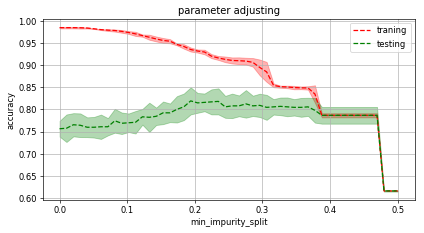

time =  0.171875
{'max_depth': 3}
best score =  0.8058361391694725


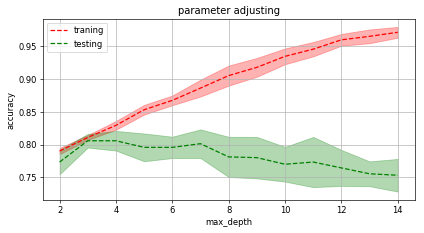

In [118]:
start = time.clock()
thresholds = np.linspace(0, 0.5, 50)
xlabel = 'min_impurity_split'
parameter_grid = {xlabel:thresholds}
clf = GridSearchCV(DecisionTreeClassifier(),parameter_grid,cv=5)
clf.fit(x,y)
print('time = ',time.clock()-start)
print(clf.best_params_)
print('best score = ',clf.best_score_)
plot_curve(thresholds,clf.cv_results_,xlabel)

start = time.clock()
depths = range(2,15)
xlabel = 'max_depth'
parameter_grid = {xlabel:depths}
clf = GridSearchCV(DecisionTreeClassifier(),parameter_grid,cv=5)
clf.fit(x,y)
print('time = ',time.clock()-start)
print(clf.best_params_)
print('best score = ',clf.best_score_)
plot_curve(depths,clf.cv_results_,xlabel)

In [119]:
start = time.clock()
depths = range(2,15)
thresholds = np.linspace(0, 0.5, 50)
parameter_grid = {'max_depth':depths,'min_impurity_split':thresholds}
clf = GridSearchCV(DecisionTreeClassifier(),parameter_grid,cv=5)
clf.fit(x,y)
print('time = ',time.clock()-start)
print(clf.best_params_)
print('best score = ',clf.best_score_)

time =  4.0625
{'max_depth': 7, 'min_impurity_split': 0.2040816326530612}
best score =  0.819304152637486


# Generating the Decision tree 
###### as .dot file, which can be transformed into .png

In [120]:
from sklearn.tree import export_graphviz

In [121]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=11,min_impurity_split=0.21428571428571427)
clf.fit(x_train, y_train)
train_score = clf.score(x_train, y_train)
test_score = clf.score(x_test, y_test)
print('train score: {0}; test score: {1}'.format(train_score, test_score))

# 导出 titanic.dot 文件
with open("titanic.dot", 'w') as f:
    f = export_graphviz(clf, out_file=f)

# 1. 在电脑上安装 graphviz
# 2. 运行 `dot -Tpng titanic.dot -o titanic.png` 
# 3. 在当前目录查看生成的决策树 titanic.png

train score: 0.9508426966292135; test score: 0.7988826815642458


In [122]:
a = np.equal(clf.predict(x_test),y_test)
a[a==True].shape[0]
print(a[a==True].shape[0]/len(x_test))

0.7988826815642458
